# Step 0: Setups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Step 1: Data Pre-processing and Exploratory Data Analysis (EDA)

In [ ]:
# Load the dataset
data = pd.read_csv("bank_loan.csv")
data.head(7)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1
5,6,37,M,13,29.0,92121,4,0.4,2,155,Rent,0,0,0,1.0,0
6,7,53,M,27,72.0,91711,2,1.5,2,0,Rent,0,0,0,1.0,0


In [30]:
# Get the summary of the statistical properties of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.750000,2500.500000,3750.250000,5000.0
Age,5000.0,46.008200,25.444898,0.0,35.000000,45.000000,55.000000,978.0
Gender,5000.0,0.702600,0.506956,0.0,0.000000,1.000000,1.000000,2.0
Experience,5000.0,20.104600,11.467954,-3.0,10.000000,20.000000,30.000000,43.0
Income,5000.0,0.349740,0.243041,0.0,0.167568,0.302703,0.464865,1.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.000000,93437.000000,94608.000000,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.000000,2.000000,3.000000,4.0
CCAvg,5000.0,0.241617,0.216090,0.0,0.087500,0.187500,0.312500,1.0
Education,5000.0,1.880600,0.839812,1.0,1.000000,2.000000,3.000000,3.0
Mortgage,5000.0,0.129199,0.227747,0.0,0.000000,0.000000,0.234333,1.0


In [4]:
# Check if the missing values are present
data.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [5]:
# Handling missing values (if any)
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0]) # Fill missing values with the most frequent value using fillna() and mode() functions
data["Income"] = data["Income"].fillna(data["Income"].mean())
data["Home Ownership"] = data["Home Ownership"].fillna(data["Home Ownership"].mode()[0])
data["Online"] = data["Online"].fillna(data["Online"].mean())

In [6]:
# Check if the missing values are present
data.isnull().sum()

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Merge values "#" and "-" into "O"
data["Gender"] = data["Gender"].replace(["#", "-"], "O")

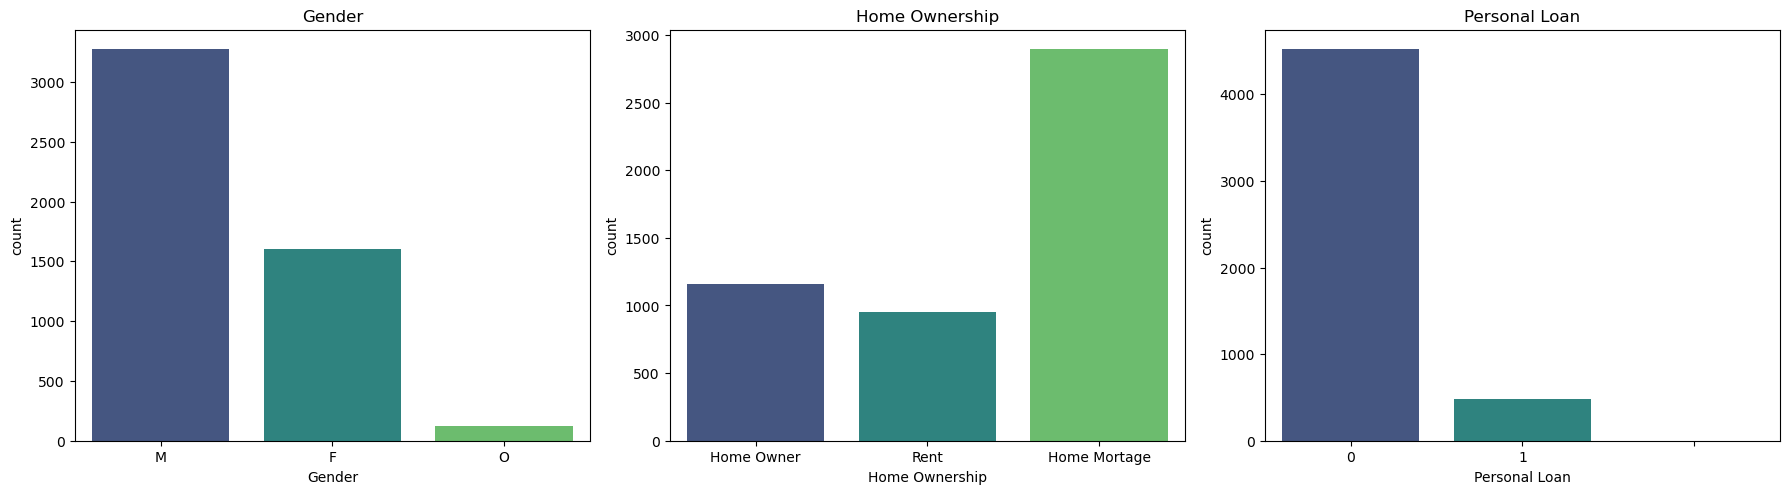

In [8]:
# EDA - Count plot for categorical features
categorical_features = ['Gender', 'Home Ownership', 'Personal Loan']
plt.figure(figsize=(18, 14))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(feature)
plt.tight_layout()
plt.show()

These count plots provide insights into the distribution of customers based on different categorical features, which can be valuable for feature engineering and model building

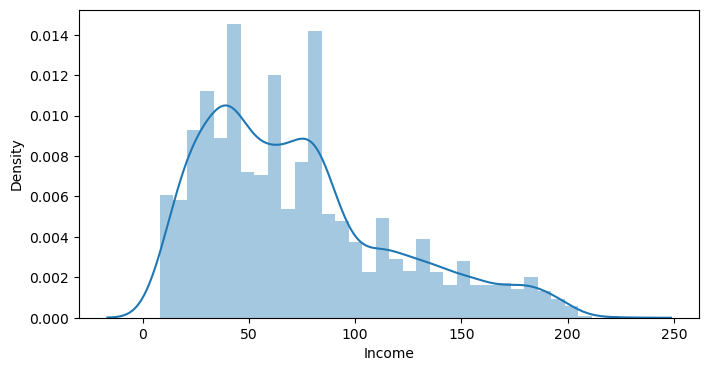

In [9]:
# EDA - The distribution of the income
plt.figure(figsize=(8, 4))
sns.distplot(data["Income"])
plt.show()

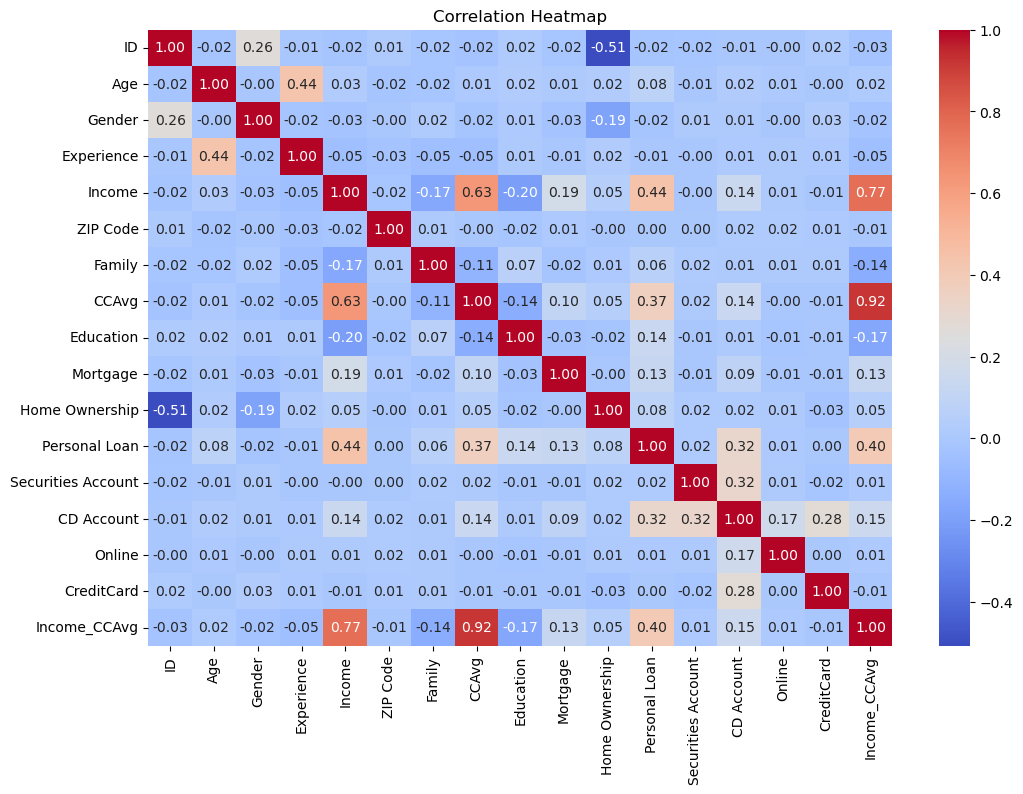

In [28]:
# EDA - Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The above heatmap shows the correlation between Age and Experience, CCAvg and Income. Additionally, it shows that Income has a high impact on Personal Loan

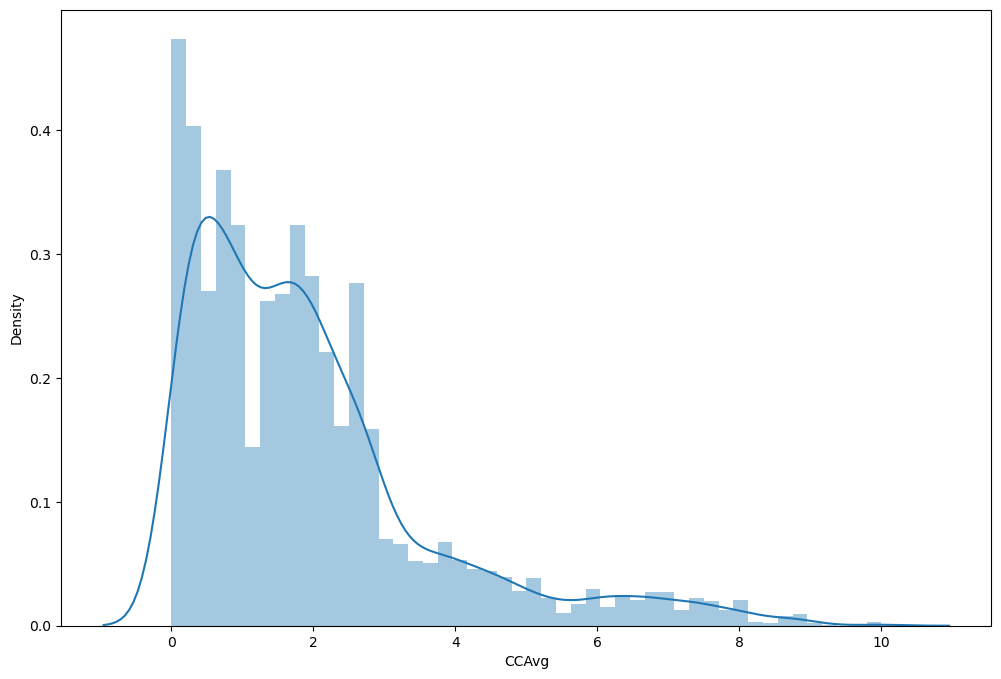

In [11]:
# EDA - The distribution of average credit card spending
plt.figure(figsize=(12,8))
sns.distplot(data["CCAvg"])
plt.show()

<Figure size 1200x800 with 0 Axes>

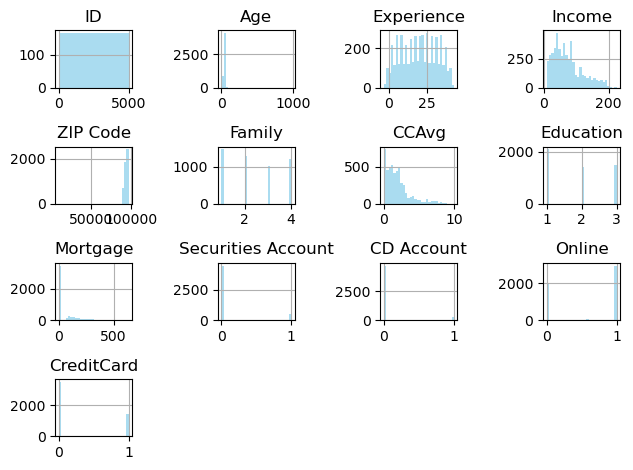

In [12]:
# EDA - Histograms of numeric features
plt.figure(figsize=(12, 8))
data.hist(bins=30, color='skyblue', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Check if the categorical features are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      5000 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              5000 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

All the categorical features are binary so that LabelEncoder is used for these columns

In [14]:
# Encode categorical variables into numerical representations
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# data["Gender"] = label_encoder.fit_transform(data["Gender"])
# data["Home Ownership"] = label_encoder.fit_transform(data["Home Ownership"])
# data["Personal Loan"] = label_encoder.fit_transform(data["Personal Loan"])

# Select columns with object data type (categorical columns)
cat_cols = data.select_dtypes(include='object').columns

# Apply LabelEncoder to each categorical column
data[cat_cols] = data[cat_cols].apply(label_encoder.fit_transform)

In [15]:
# Making sure, there is no categorical features present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   int32  
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      5000 non-null   int32  
 11  Personal Loan       5000 non-null   int32  
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              5000 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [16]:
# Split the data into training and testing sets
X = data.drop(["ID", "Personal Loan"], axis=1)
y = data["Personal Loan"]

Since ID is completely unique and not correlated with other column, so that it is dropped using drop() fuction

# Step 2: Feature Engineering

In [17]:
# Outlier Handling (capping at 99th percentile)
for column in ['Income', 'CCAvg', 'Mortgage']:
    percentile_99 = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: min(x, percentile_99))

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
data[['Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(data[['Income', 'CCAvg', 'Mortgage']])

# Feature Interaction (combining Income and CCAvg)
data['Income_CCAvg'] = data['Income'] * data['CCAvg']

# Polynomial Features (quadratic terms)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names(input_features=X.columns))

# Dimensionality Reduction using PCA
pca = PCA(n_components=5)  # Choose appropriate number of components
X_pca = pca.fit_transform(X_poly)

# Step 3: Handle Class Imbalance

In [18]:
# Check class distribution
class_counts = y.value_counts()
print("Class Distribution:")
print(class_counts)

# Handle Class Imbalance using SMOTE if required
X_resampled, y_resampled = X, y  # Initialize with original data
if class_counts[0] <= 1 or class_counts[1] <= 1:
    print("Class imbalance is severe. Consider using different techniques or more data.")
else:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

Class Distribution:
1    4520
2     479
0       1
Name: Personal Loan, dtype: int64
Class imbalance is severe. Consider using different techniques or more data.


In [19]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Model Building and Training

In [20]:
# Hyperparameter Tuning and Model Selection with Stratified K-Folds Cross-Validation
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Random Forest Classifier
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=cv_stratified)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

In [22]:
# Hyperparameter Tuning for Logistic Regression
log_reg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

In [23]:
# AdaBoost Classifier
adb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}
adb_grid = GridSearchCV(AdaBoostClassifier(random_state=42), adb_params, cv=5)
adb_grid.fit(X_train, y_train)
adb_best_model = adb_grid.best_estimator_

In [24]:
# Support Vector Machine Classifier
# svm_params = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
# }
# svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5)
# svm_grid.fit(X_train, y_train)
# svm_best_model = svm_grid.best_estimator_

Due to its prolonged processing time, the Support Vector Machine Classifier was omitted from the experimentation phase

# Step 5: Model Evaluation

In [25]:
# Evaluate the Models
models = {
    'Random Forest': rf_best_model,
    'Logistic Regression': best_log_reg,
    'AdaBoost': adb_best_model,
#     'Support Vector Machine': svm_best_model,
}

In [26]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_rep)
    print("------------------------")

Random Forest Model:
Accuracy: 0.985
Confusion Matrix:
[[894   1]
 [ 14  91]]
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       895
           2       0.99      0.87      0.92       105

    accuracy                           0.98      1000
   macro avg       0.99      0.93      0.96      1000
weighted avg       0.99      0.98      0.98      1000

------------------------
Logistic Regression Model:
Accuracy: 0.9
Confusion Matrix:
[[879  16]
 [ 84  21]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.98      0.95       895
           2       0.57      0.20      0.30       105

    accuracy                           0.90      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.88      0.90      0.88      1000

------------------------
AdaBoost Model:
Accuracy: 0.871
Confusion Matrix:
[[799  96]
 [ 33  72]]
Classification Re

The Random Forest model achieved the highest accuracy among the three models. It performed exceptionally well in correctly predicting class 1 (accepted loan) with high precision and recall. The model also showed good performance for class 2 (rejected loan) with a high precision score but a slightly lower recall score.

The Logistic Regression model achieved decent accuracy but showed a significant imbalance in precision and recall scores between the two classes. It performed well for class 1 (accepted loan) with relatively high precision and recall. However, it struggled to predict class 2 (rejected loan), with relatively low precision and recall scores.

The AdaBoost model achieved reasonable accuracy but had imbalanced precision and recall scores for the two classes. It performed well for class 1 (accepted loan) with high precision and recall. However, it struggled to predict class 2 (rejected loan), with relatively low precision and moderate recall scores.

The result concludes that the Random Forest model outperformed the other two models in terms of overall accuracy and balanced precision-recall scores for both classes. It demonstrated better performance in predicting loan acceptance and rejection.

# Step 6: Save the Model

In [27]:
# Save the best model
best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[1]
joblib.dump(best_model, 'bank_loan_best_model.pkl')

['bank_loan_best_model.pkl']